In [2]:
!nvidia-smi

Fri Jul 26 01:02:53 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.99                 Driver Version: 555.99         CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   61C    P5              7W /   40W |     521MiB /   4096MiB |     32%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import os
HOME = os.getcwd()
print(HOME)

c:\Users\M S I\Documents\CODE\YOLO V8


## Install YOLOv8



In [4]:

# !pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196  Python-3.12.4 torch-2.4.0 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
Setup complete  (12 CPUs, 15.7 GB RAM, 222.3/228.2 GB disk)


In [5]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [6]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

## Inference with Pre-trained COCO Model

### 💻 CLI

In [7]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='rambu2.jpg' save=True

c:\Users\M S I\Documents\CODE\YOLO V8


D:\anaconda\Lib\site-packages\ultralytics\nn\tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load
Ultralytic

c:\Users\M S I\Documents\CODE\YOLO V8


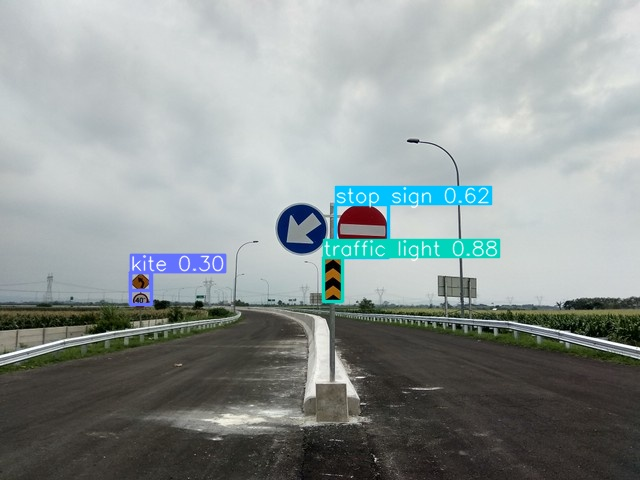

In [8]:
%cd {HOME}
Image(filename='runs/detect/predict3/rambu2.jpg', height=600)

### 🐍 Python SDK



In [9]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='rambu3.jpg', conf=0.25)

d:\anaconda\Lib\site-packages\ultralytics\nn\tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load

image 1/1

In [10]:
results[0].boxes.xyxy

tensor([[ 781.0273,  547.4396,  848.8389,  673.2617],
        [ 774.8185,  607.5425,  848.0369,  701.7758],
        [1085.6548,  585.7721, 1115.6307,  637.3609],
        [ 779.9488,  634.5982,  836.8799,  701.8315],
        [1085.9115,  585.4637, 1115.7749,  636.2455]], device='cuda:0')

In [11]:
results[0].boxes.conf

tensor([0.7340, 0.5257, 0.3426, 0.2883, 0.2514], device='cuda:0')

In [12]:
results[0].boxes.cls

tensor([0., 3., 3., 3., 0.], device='cuda:0')

In [13]:
%cd {HOME}/datasets

c:\Users\M S I\Documents\CODE\YOLO V8\datasets


In [14]:

from roboflow import Roboflow
rf = Roboflow(api_key="P20EYnywtxKhXRmMrgET")
project = rf.workspace("putri-mawaring-wening-lwwcx").project("traffic-sign-in-indonesia-detection")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


## Custom Training

In [15]:
print(dataset.location)
print(HOME)

c:\Users\M S I\Documents\CODE\YOLO V8\datasets\Traffic-Sign-in-Indonesia-Detection-3
c:\Users\M S I\Documents\CODE\YOLO V8


In [37]:
%cd {HOME}

!yolo task=detect mode=train model="C:\Users\M S I\Documents\CODE\YOLO V8\yolov8n.pt" data="C:\Users\M S I\Documents\CODE\YOLO V8\datasets\Traffic-Sign-in-Indonesia-Detection-3\data.yaml" epochs=25 imgsz=800 plots=True

c:\Users\M S I\Documents\CODE\YOLO V8
^C


In [22]:
!ls {HOME}/runs/detect/train/

'ls' is not recognized as an internal or external command,
operable program or batch file.


c:\Users\M S I\Documents\CODE\YOLO V8


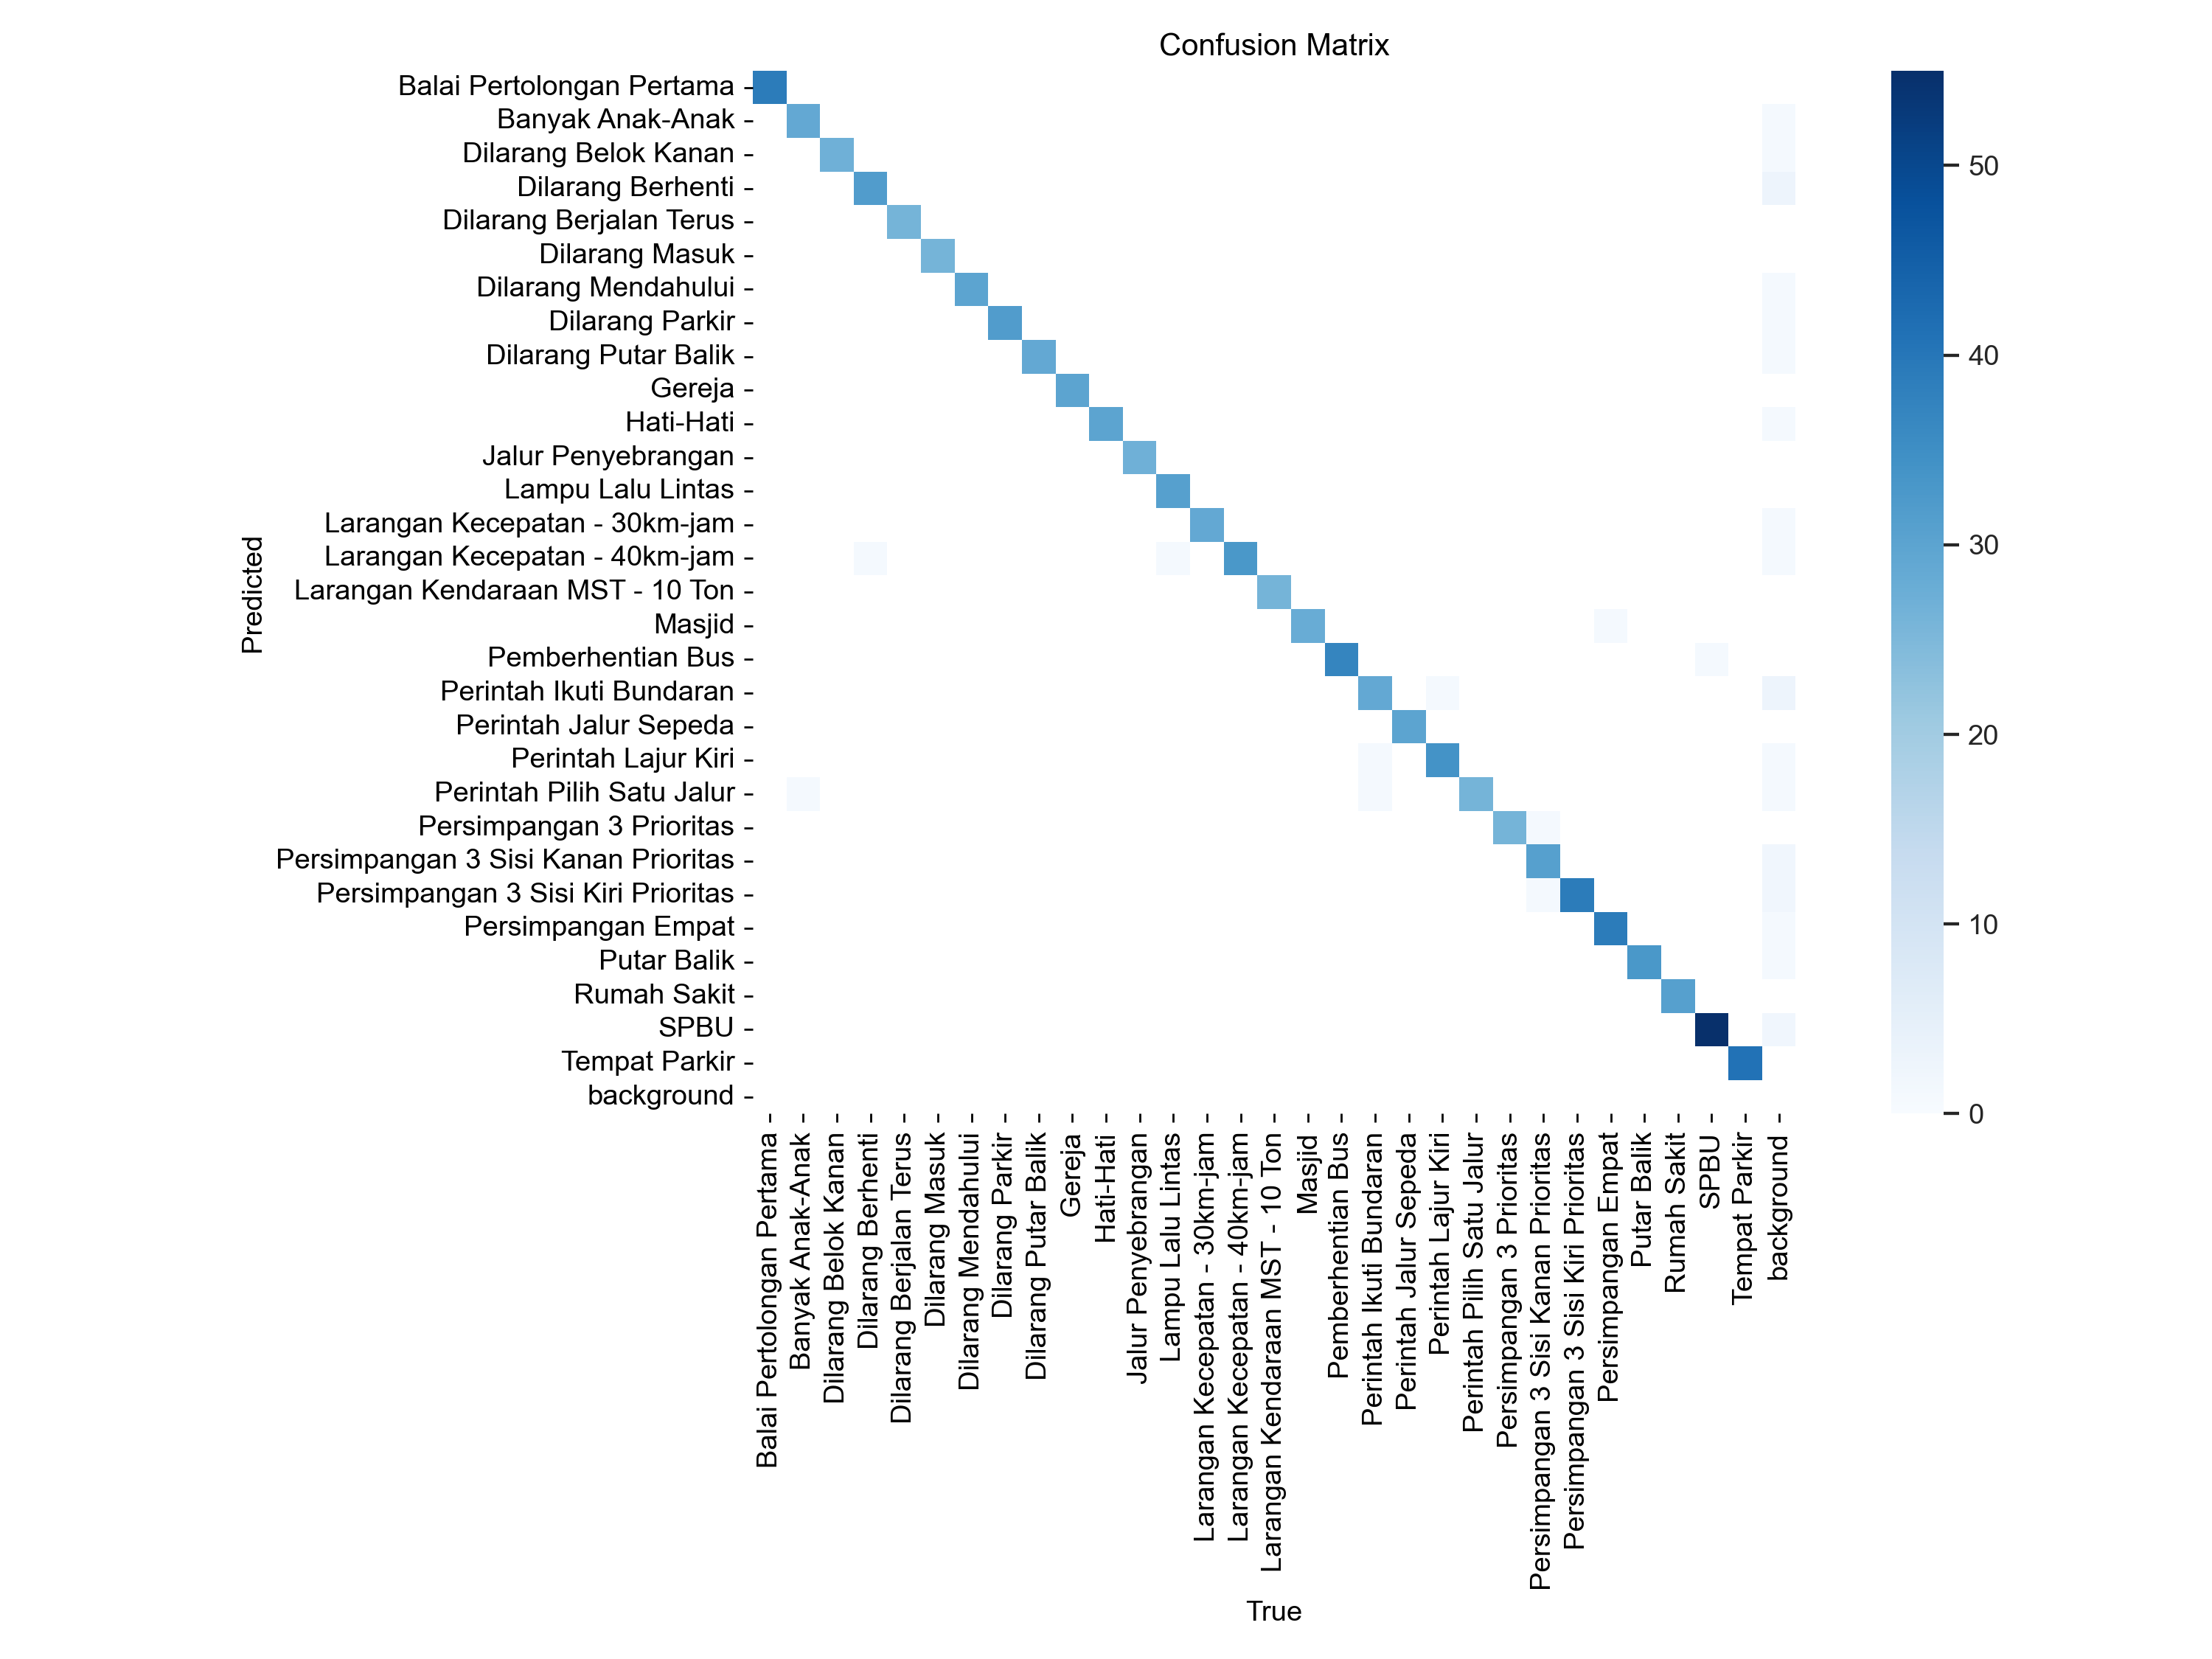

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train11/confusion_matrix.png', width=600)

c:\Users\M S I\Documents\CODE\YOLO V8


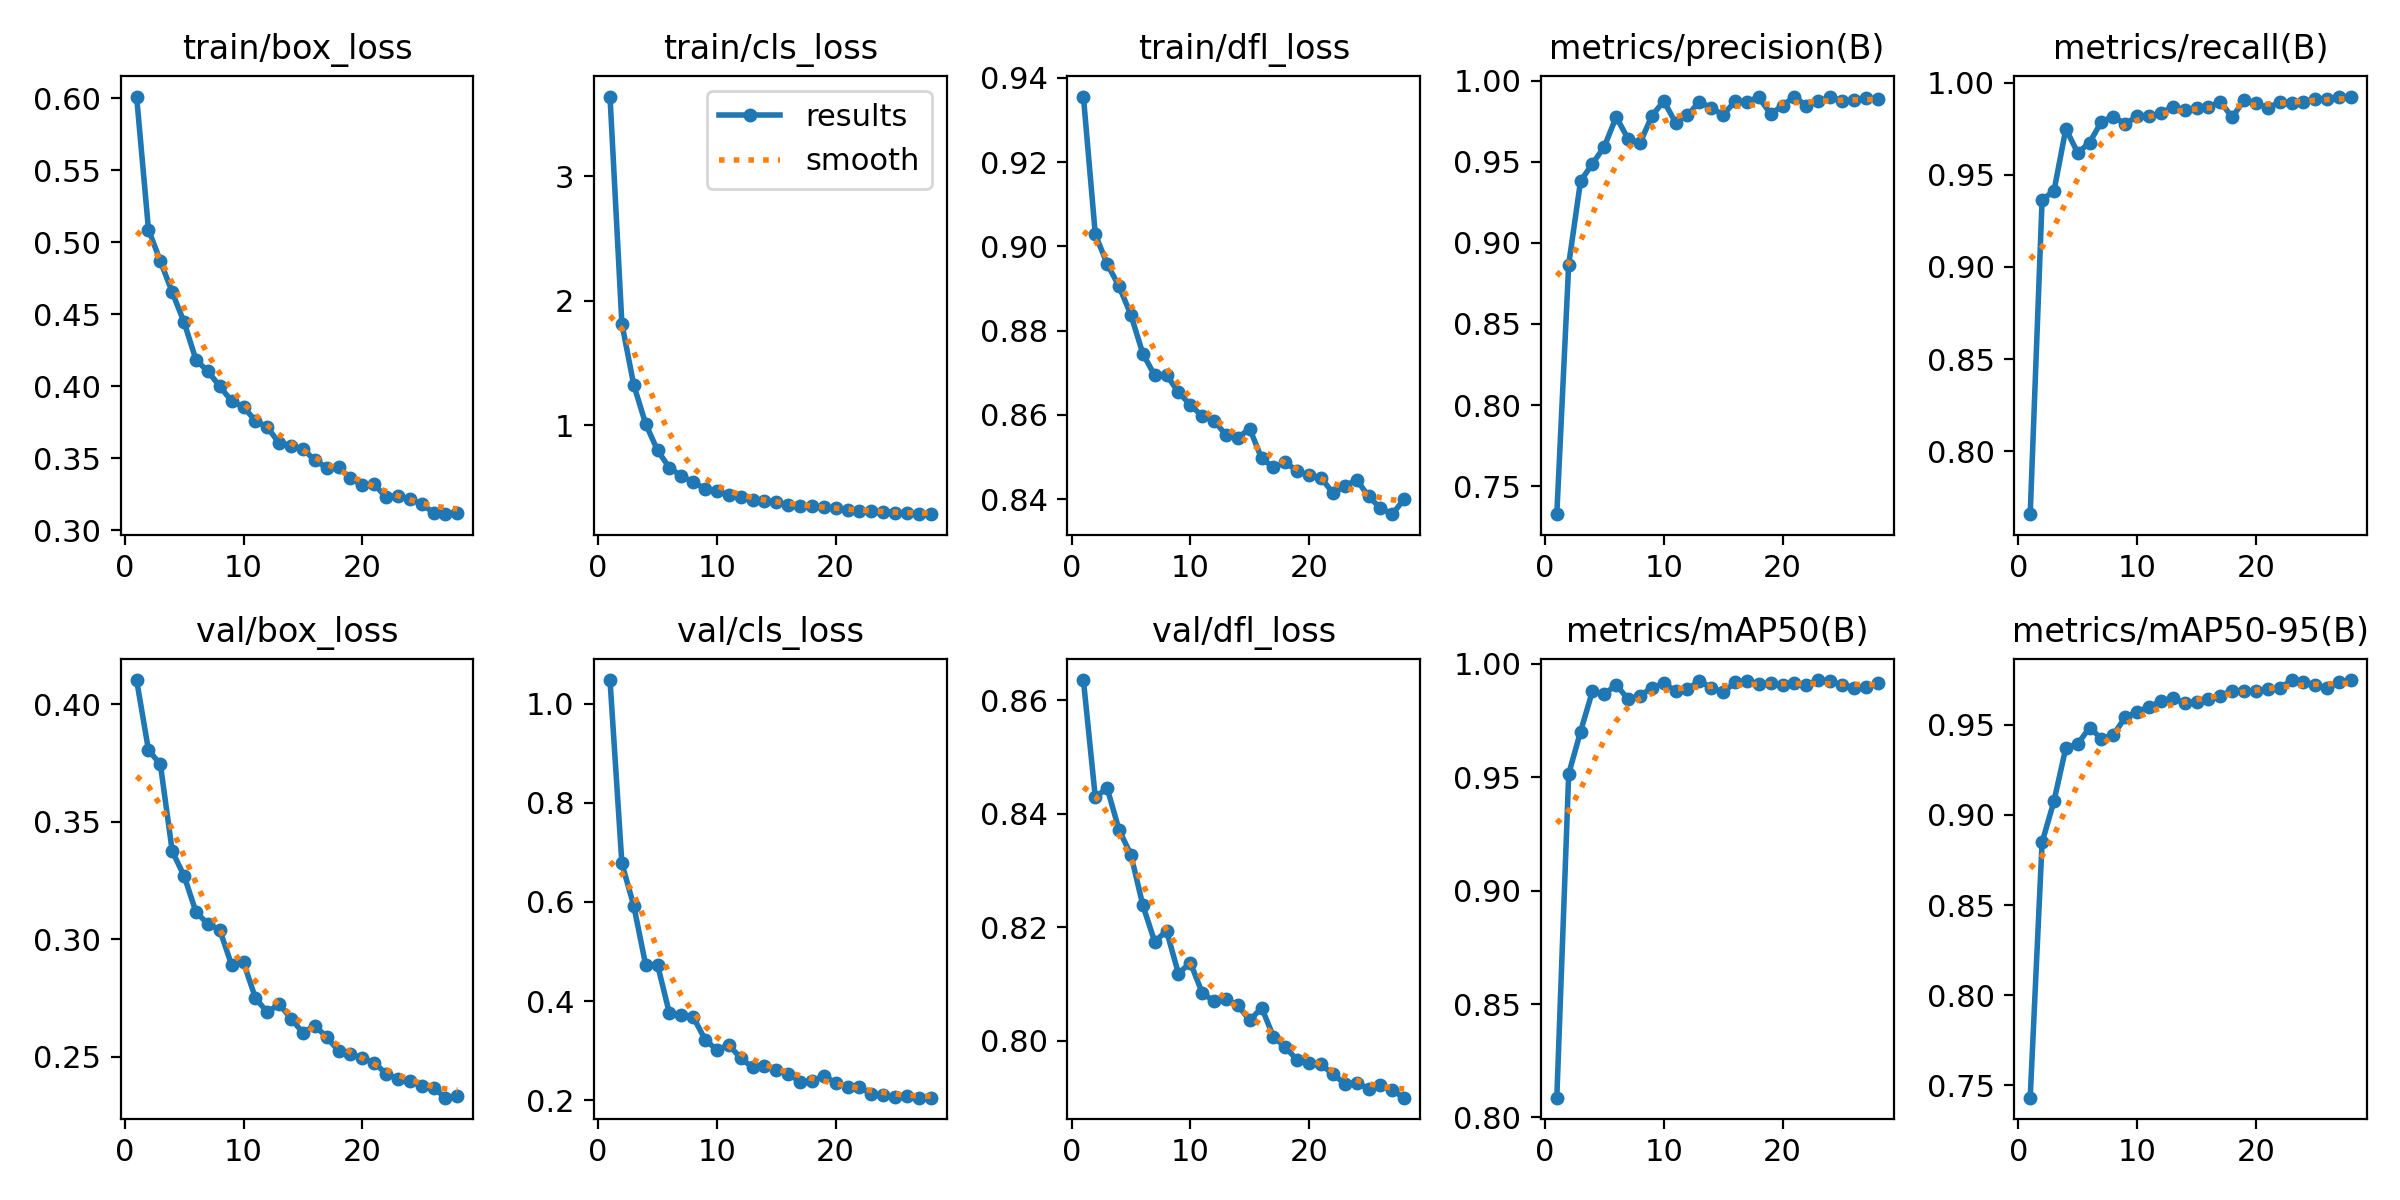

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train11/results.png', width=600)

c:\Users\M S I\Documents\CODE\YOLO V8


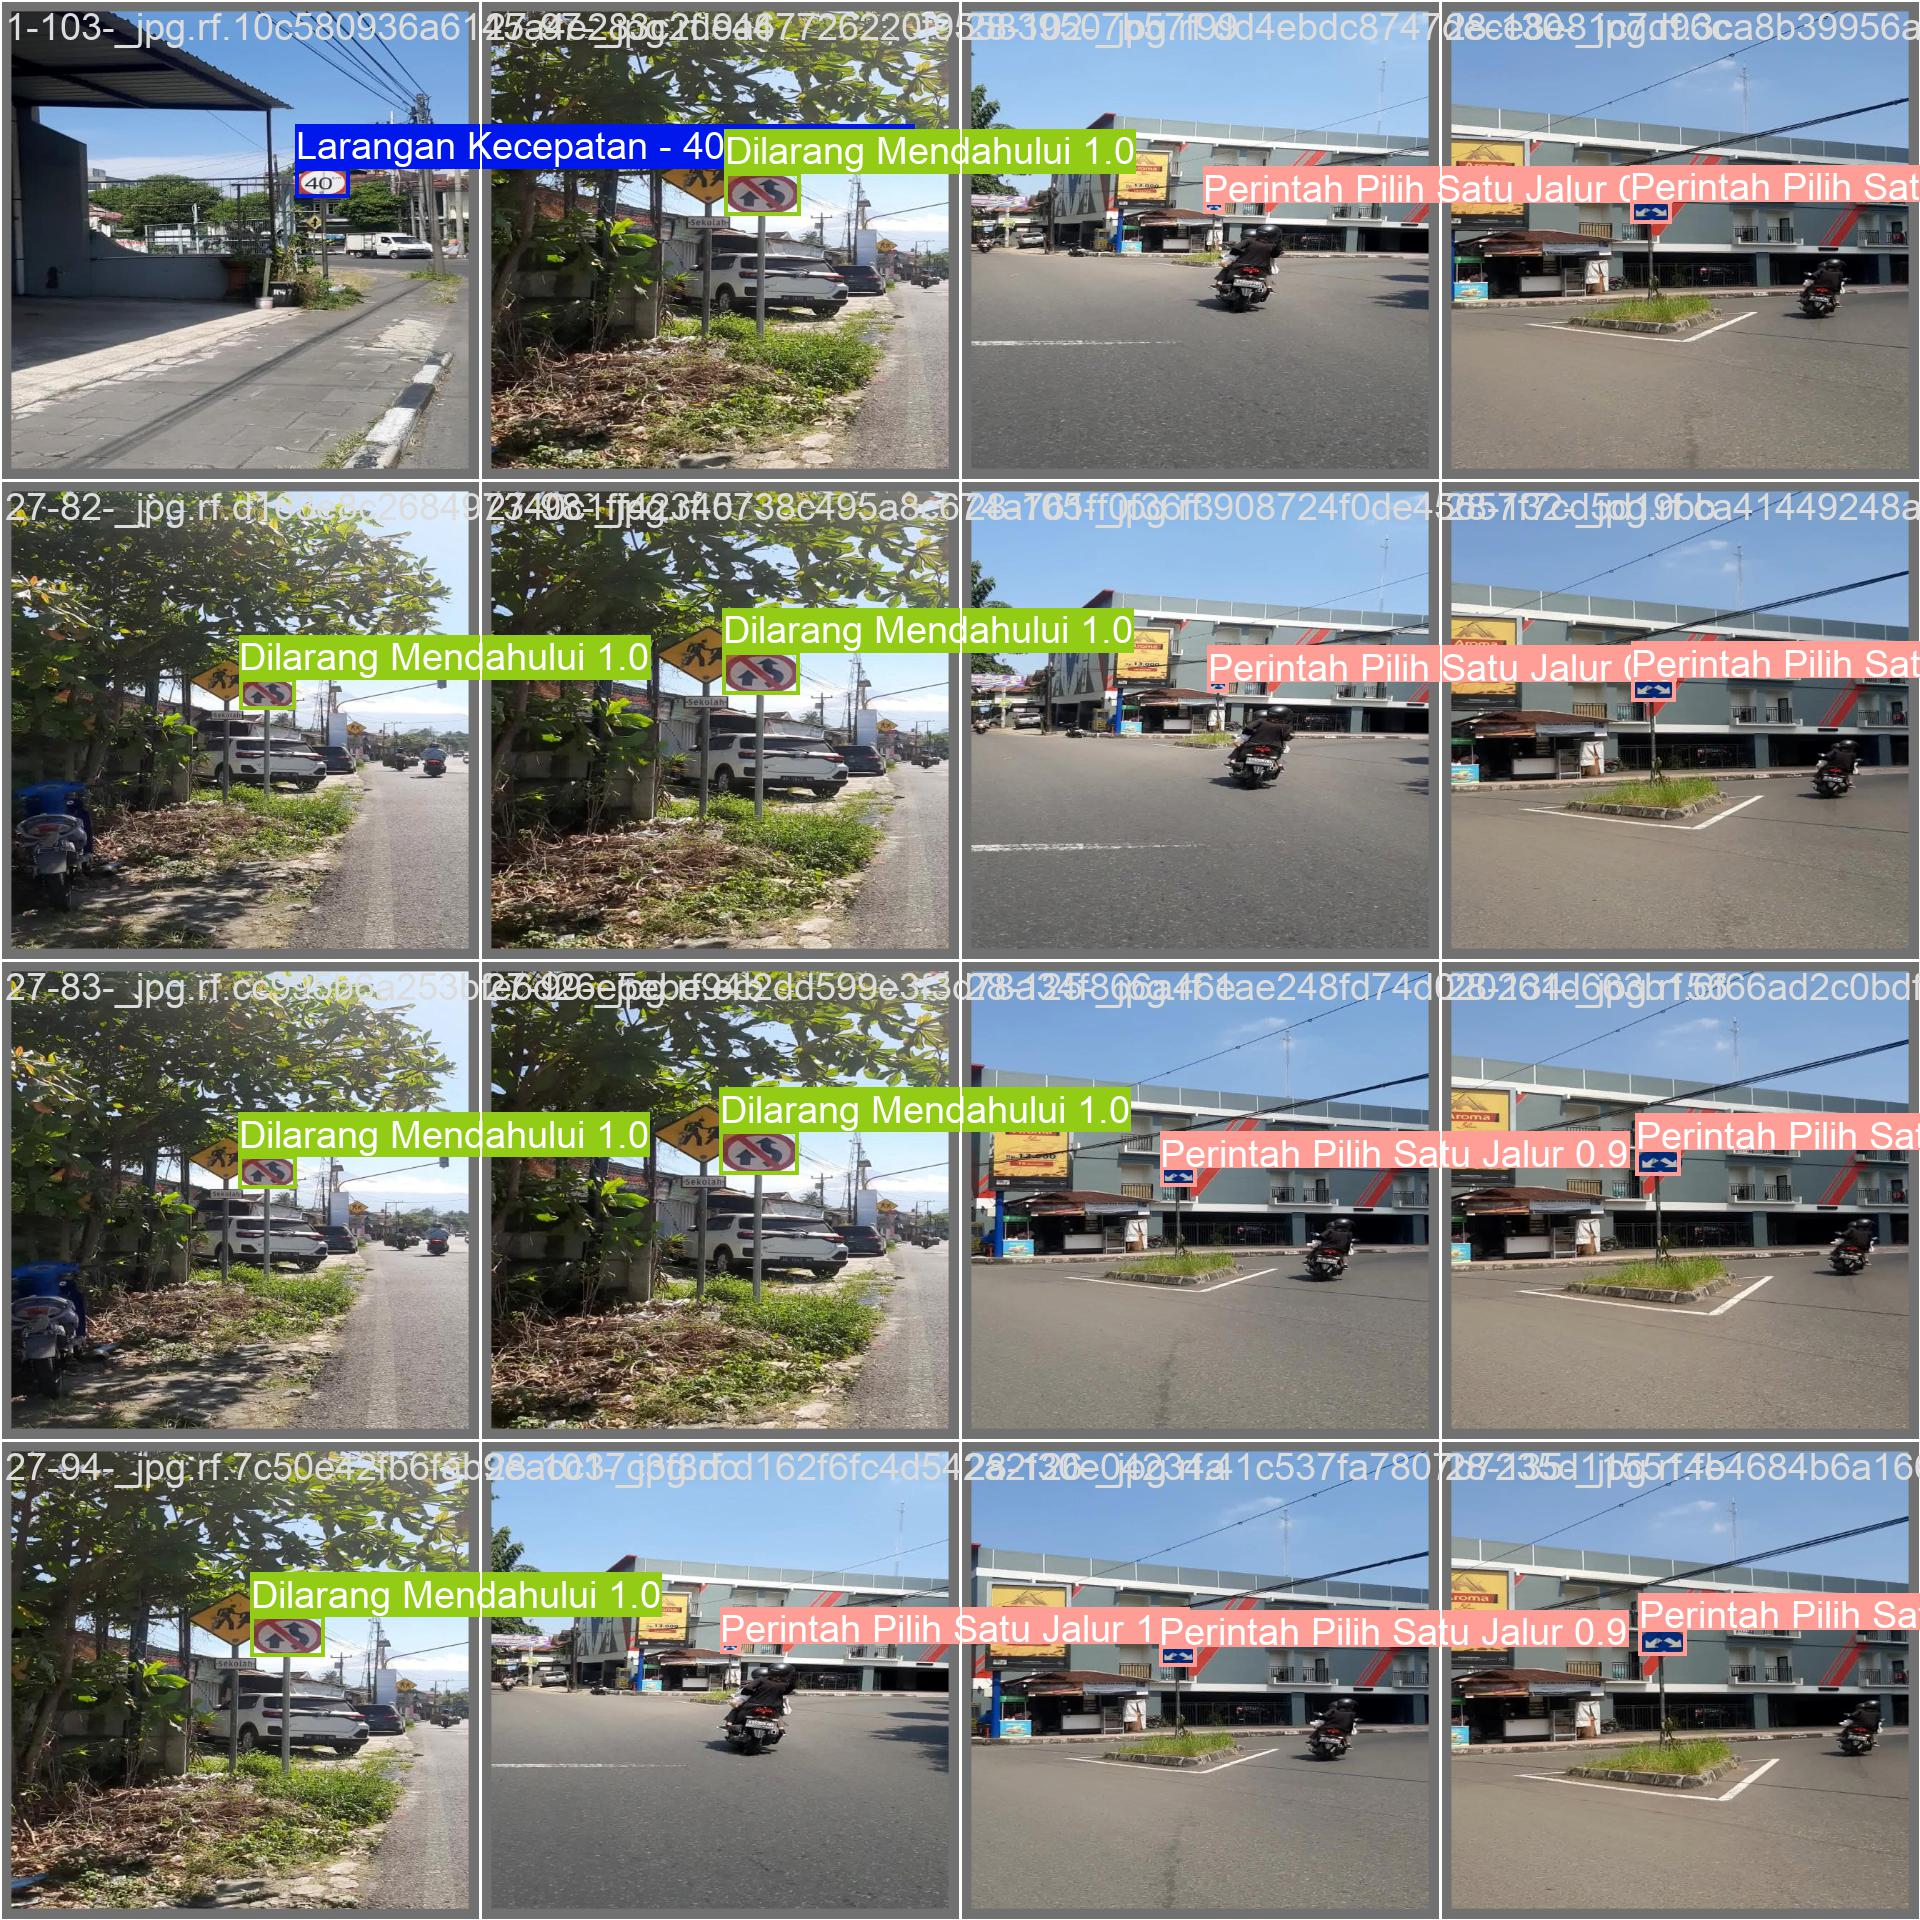

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train11/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [19]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train11/weights/best.pt data={dataset.location}/data.yaml

c:\Users\M S I\Documents\CODE\YOLO V8


WARNING  settings error: 'not enough values to unpack (expected 2, got 1)'. Please see https://docs.ultralytics.com/quickstart/#ultralytics-settings for help.


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.9 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
image 1/13 /content/datasets/football-players-detection-1/test/images/40cd38_7_6_png.rf.68ef7fcd663cdf0f5b96bacdbcd94e07.jpg: 384x640 21 players, 15.0ms
image 2/13 /content/datasets/football-players-detection-1/test/images/42ba34_1_5_png.rf.4337fde8fbe3640cf4351fb41ac9c3ca.jpg: 384x640 1 goalkeeper, 21 players, 2 referees, 11.6ms
image 3/13 /content/datasets/football-players-detection-1/test/images/42ba34_5_5_png.rf.ceb556bd4c92d41496ae1d8c56600c4a.jpg: 384x640 1 goalkeeper, 20 players, 1 referee, 11.7ms
image 4/13 /content/datasets/football-players-detection-1/test/images/4b770a_1_4_png.rf.5a45b3b841a06de414ceb802e34c136f.jpg: 384x640 1 goalkeeper, 20 players, 4 referees, 11.6ms
image 5/13 /content/datasets/football-players-detection-1/test/images/4b770a_3_6_png.rf.d0d9403f2f73ca0da7a6a1373c02b749.jpg:

**Result:** 

In [23]:
!yolo task=detect mode=predict model=best.pt conf=0.25 source='rambu2.jpg' save=True

D:\anaconda\Lib\site-packages\ultralytics\nn\tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load
Ultralytic

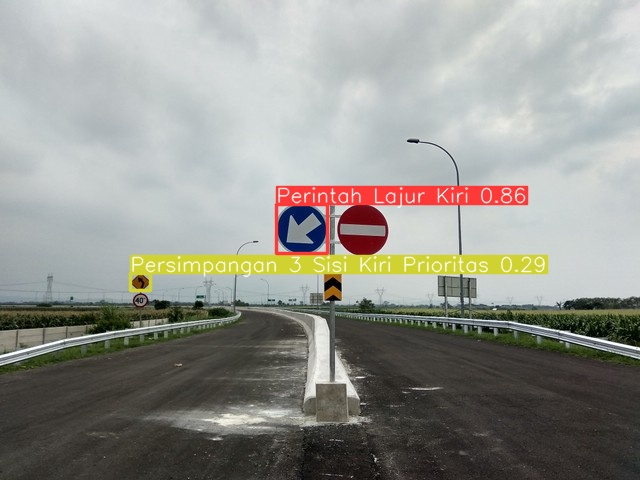

In [24]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict7/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")